In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\shubh\Downloads\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='Salary', ylabel='YearsExperience'>

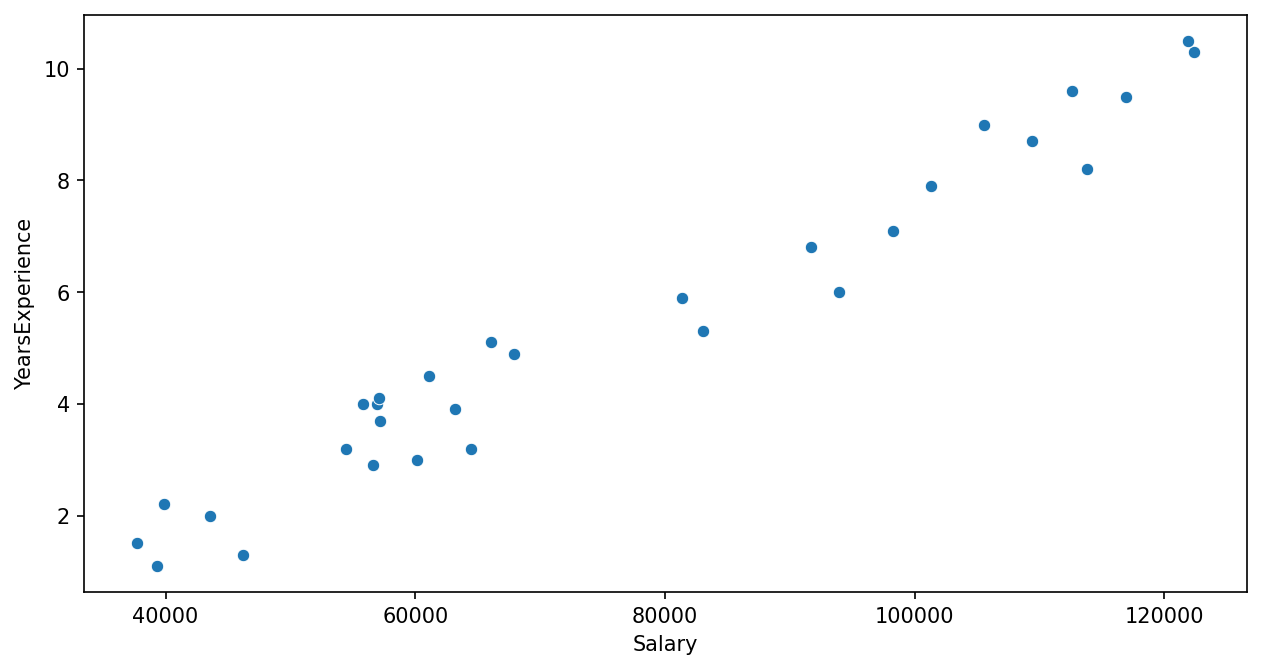

In [4]:
sns.scatterplot(x=df['Salary'],y=df['YearsExperience'])

<Axes: >

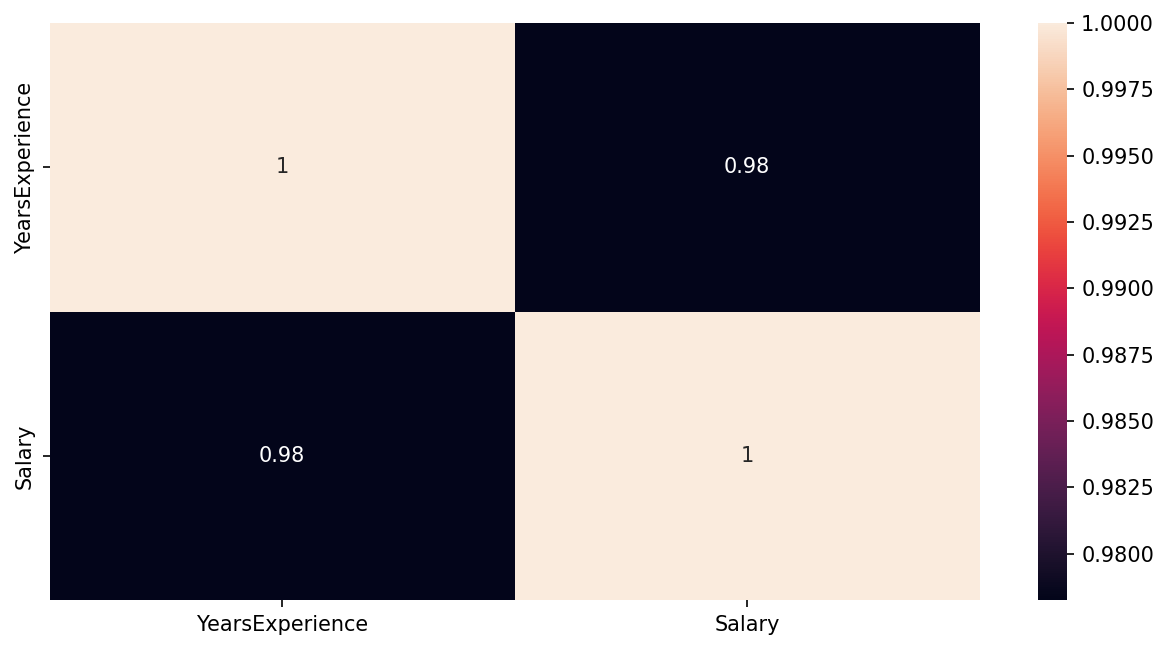

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
import statsmodels.formula.api as smf

In [7]:
model = smf.ols('Salary~YearsExperience',data=df).fit()
model

In [8]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [9]:
Years_of_experience = 6

Salary_hike = 9449.962321*Years_of_experience+25792.200199
Salary_hike

82491.97412500001

In [10]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [11]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [12]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
test = pd.DataFrame({
    'YearsExperience' : [3.0,4.0,5.1,7.9,10.3]
})
test

,YearsExperience
0,3.0
1,4.0
2,5.1
3,7.9
4,10.3


In [14]:
model.predict(test)

0     54142.087163
1     63592.049484
2     73987.008038
3    100446.902538
4    123126.812110
dtype: float64

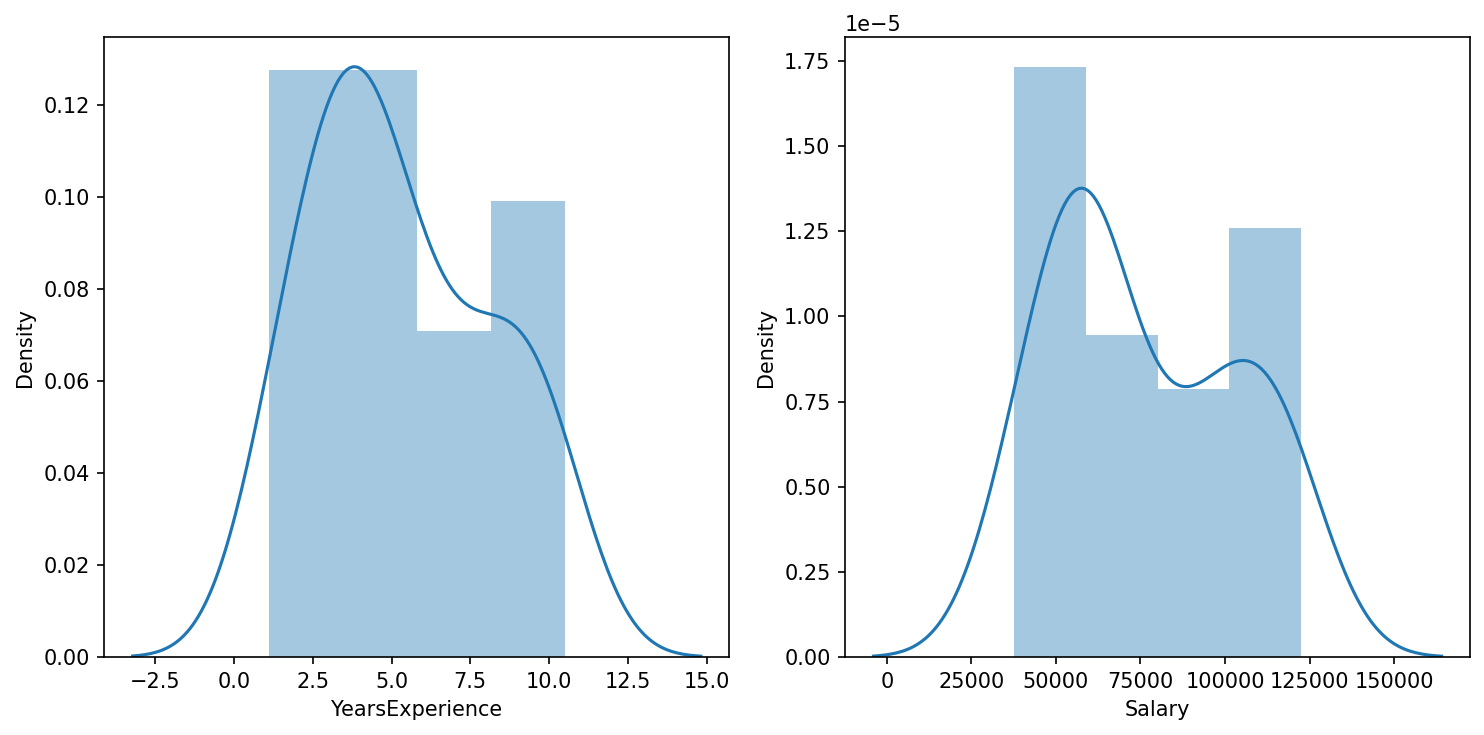

In [15]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Salary'])

plt.tight_layout()

In [17]:
df['YearsExperience'].skew()

0.37956024064804106

In [18]:
df['Salary'].skew()

0.35411967922959153

# Log Transformation

In [19]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [20]:
np.log(df['YearsExperience'])

0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: YearsExperience, dtype: float64

In [22]:
df['log_YE'] = np.log(df['YearsExperience'])
df

,YearsExperience,Salary,log_YE
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457
5,2.9,56642.0,1.064711
6,3.0,60150.0,1.098612
7,3.2,54445.0,1.163151
8,3.2,64445.0,1.163151
9,3.7,57189.0,1.308333


In [23]:
df['log_S'] = np.log(df['Salary'])
df

,YearsExperience,Salary,log_YE,log_S
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


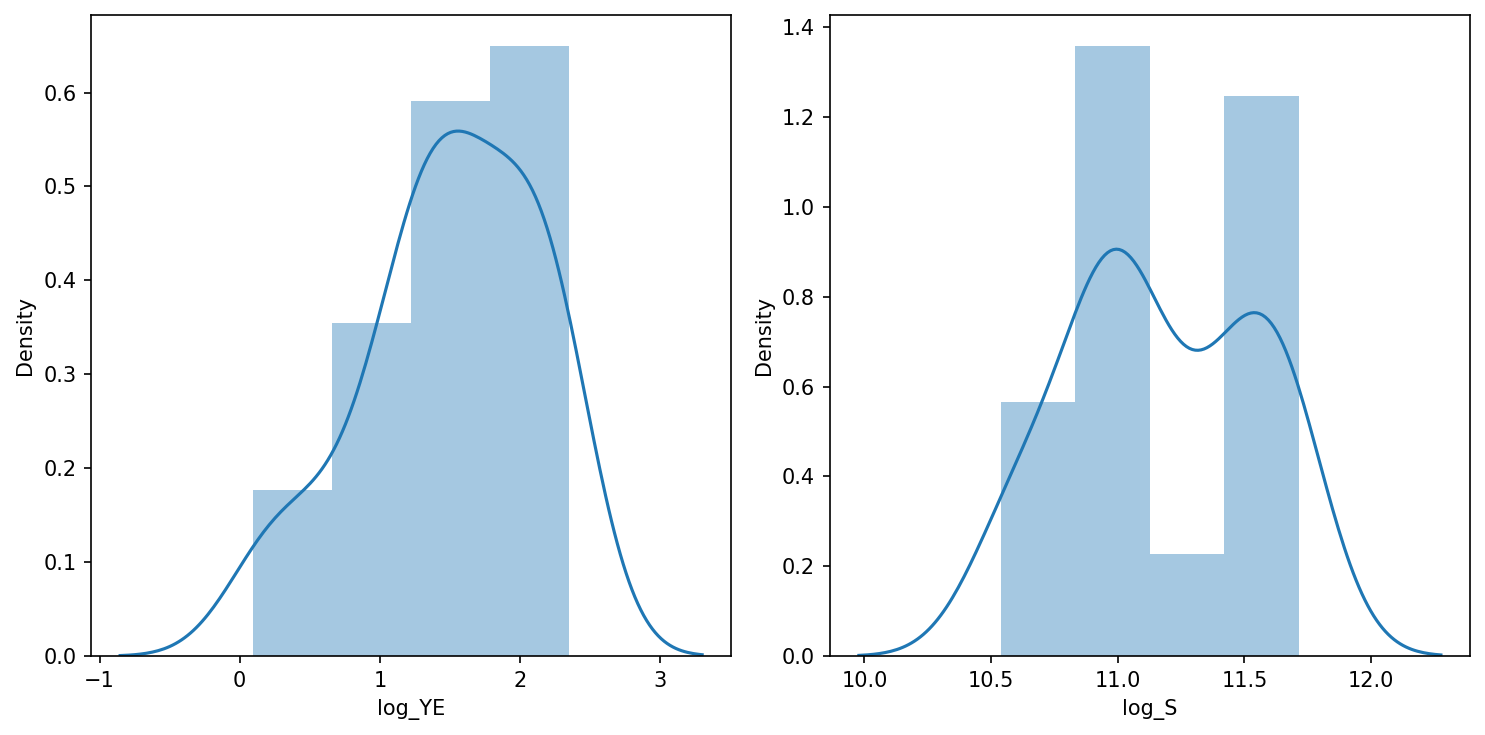

In [25]:
plt.subplot(1,2,1)
sns.distplot(df['log_YE'])
plt.subplot(1,2,2)
sns.distplot(df['log_S'])
plt.tight_layout()

In [26]:
df['log_YE'].skew(), df['log_S'].skew()

(-0.6005648582626513, -0.044126086756988495)

# Sqrt Transformation

In [27]:
df['sqrt_YE'] = np.sqrt(df['YearsExperience'])
df['sqrt_S'] = np.sqrt(df['Salary'])
df

,YearsExperience,Salary,log_YE,log_S,sqrt_YE,sqrt_S
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314
5,2.9,56642.0,1.064711,10.944506,1.702939,237.995798
6,3.0,60150.0,1.098612,11.004597,1.732051,245.254969
7,3.2,54445.0,1.163151,10.904946,1.788854,233.334524
8,3.2,64445.0,1.163151,11.073567,1.788854,253.860198
9,3.7,57189.0,1.308333,10.954117,1.923538,239.142217


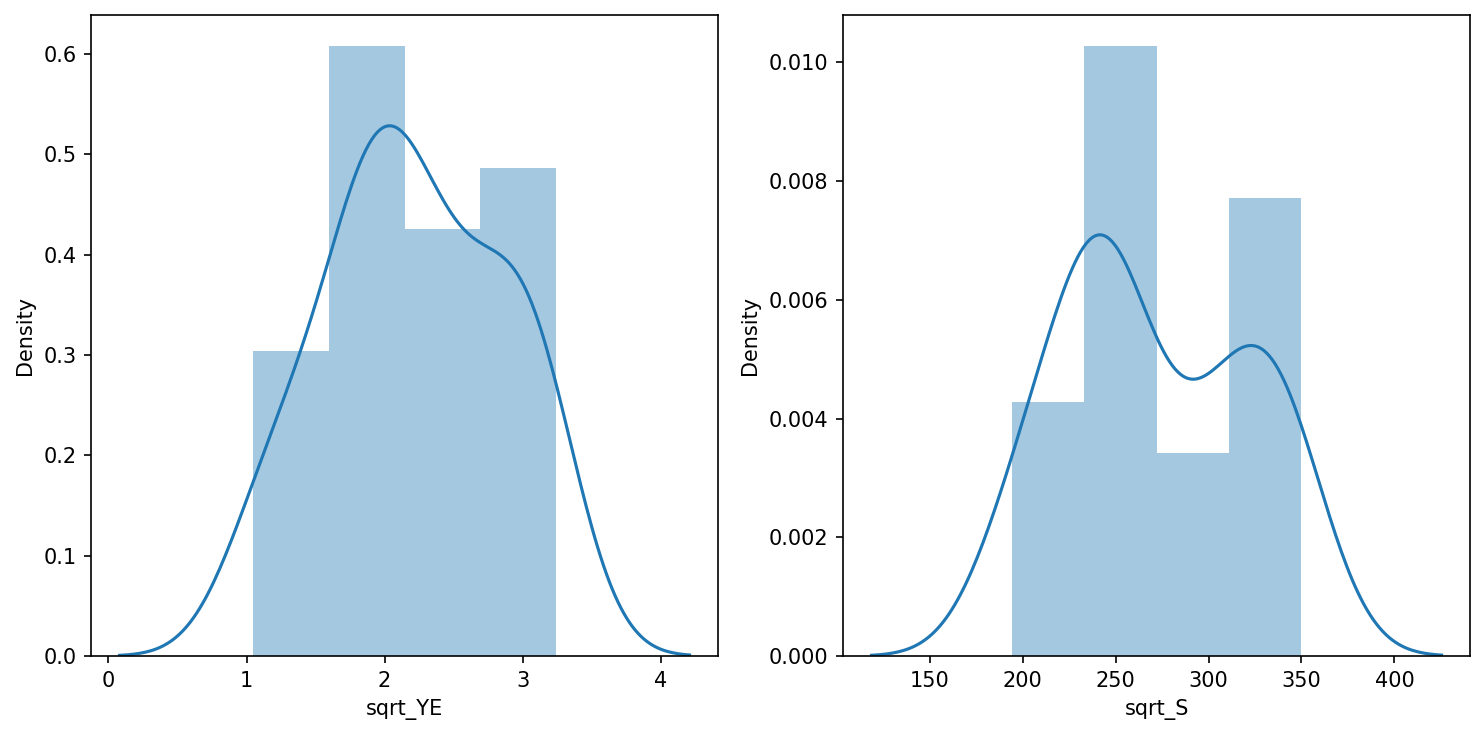

In [28]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_YE'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_S'])

plt.tight_layout()

In [29]:
df['sqrt_YE'].skew()

-0.04919608394250605

In [30]:
df['sqrt_S'].skew()

0.16904336802767353